In [193]:
import pandas as pd

df     = pd.read_csv('recommender-dataset-test-3.csv')
cities = pd.read_csv('cities.csv')
states = pd.read_csv('us_population.csv', encoding='latin1')
densities = pd.read_json('us-states.json')
df = df.merge(cities, left_on='city', right_on='city')

In [194]:
states['population'] = pd.to_numeric(states['population'], errors='coerce')
states

Rank in the fifty states, 2017  Rank in all states and territories, 2010  \
0                               1                                         1   
1                               2                                         2   
2                               3                                         4   
3                               4                                         3   
4                               5                                         6   
5                               6                                         5   
6                               7                                         7   
7                               8                                         9   
8                               9                                        10   
9                              10                                         8   
10                             11                                        11   
11                             12                                        12   
12                             13                                        13   
13                             14                                        16   
14                             15                                        14   
15                             16                                        17   
16                             17                                        15   
17                             18                                        18   
18                             19                                        19   
19                             20                                        20   
20                             21                                        22   
21                             22                                        21   
22                             23                                        24   
23                             24                                        23   
24                             25                                        25   
25                             26                                        26   
26                             27                                        27   
27                             28                                        28   
28                             29                                        30   
29                                                                      29   
30                             30                                        31   
31                             31                                        35   
32                             32                                        33   
33                             33                                        36   
34                             34                                        32   
35                             35                                        34   
36                             36                                        37   
37                             37                                        39   
38                             38                                        38   
39                             39                                        40   
40                             40                                        41   
41                             41                                        43   
42                             42                                        42   
43                             43                                        44   
44                             44                                        45   
45                             45                                        46   
46                             46                                        47   
47                             47                                        49   
48                             48                                        48   
49                                                  

In [174]:
ddf = pd.merge(df, states, left_on='region_y', right_on='state', how='left')

In [247]:
ddf['drinking']

0     Social Drinker
1     Social Drinker
2     Social Drinker
3     Social Drinker
4     Social Drinker
5        Non Drinker
6      Heavy Drinker
7      Heavy Drinker
8        Non Drinker
9        Non Drinker
10    Social Drinker
11    Social Drinker
12    Social Drinker
13    Social Drinker
14    Social Drinker
15    Social Drinker
16    Social Drinker
17    Social Drinker
18    Social Drinker
19    Social Drinker
20    Social Drinker
21    Social Drinker
22    Social Drinker
23    Social Drinker
24    Social Drinker
25    Social Drinker
26    Social Drinker
27    Social Drinker
28       Non Drinker
29       Non Drinker
30       Non Drinker
31    Social Drinker
32    Social Drinker
33    Social Drinker
34    Social Drinker
35       Non Drinker
36       Non Drinker
37    Social Drinker
38    Social Drinker
39    Social Drinker
40    Social Drinker
41    Social Drinker
Name: drinking, dtype: object

In [252]:
bodies = {'Slim':1, 'Athletic':2, 'Average':3, 'Curvy':4, 'A Few Extra Pounds':5}

def convertBody(body):
    return bodies[body]

ddf['body type'].replace(bodies, inplace=True)

In [253]:
ddf['body type']

0     1
1     2
2     1
3     1
4     1
5     4
6     5
7     3
8     2
9     1
10    5
11    5
12    5
13    5
14    5
15    5
16    5
17    5
18    5
19    5
20    3
21    3
22    3
23    2
24    2
25    2
26    2
27    2
28    1
29    1
30    1
31    4
32    4
33    4
34    4
35    2
36    1
37    2
38    2
39    5
40    5
41    2
Name: body type, dtype: int64

In [178]:
ddf['SBF_total'] = ddf['population'] / ddf['SBF']


In [180]:
ddf[['SBF_total', 'state']]

SBF_total           state
0   6.576186e+02       Minnesota
1   3.373147e+03      California
2   1.804491e+05        New York
3   3.284115e+04            Ohio
4   2.481175e+06        New York
5   5.744135e+04            Utah
6   1.442623e+03         Florida
7   1.537195e+04      California
8   8.822112e+01        New York
9   8.822112e+01        New York
10  1.559050e+05   Massachusetts
11  3.627216e+05      California
12  5.416386e+05         Alabama
13  3.259800e+03       Louisiana
14  2.368333e+04     Mississippi
15  1.286521e+06      New Jersey
16  1.004039e+04         Indiana
17  3.766160e+05          Oregon
18  3.198088e+05       Tennessee
19  9.667507e+04        Colorado
20  3.030061e+04        Kentucky
21  3.331031e+05            Ohio
22           NaN             NaN
23  1.029600e+05      California
24  7.503150e+04         Georgia
25  3.538074e+06           Texas
26  3.666229e+04            Ohio
27  4.982365e+05        Virginia
28  8.089943e+02  North Carolina
29  1.660385e+05        Michigan
30  8.394980e+05       Tennessee
31  5.514178e+03      California
32  7.448578e+05           Texas
33  1.364700e+05        Michigan
34  2.590667e+05         Florida
35  4.669500e+02      California
36  4.669500e+02      California
37  6.097535e+03  South Carolina
38  6.622555e+04      California
39  5.643432e+04      New Mexico
40  6.289153e+01          Nevada
41  1.325399e+03      California

In [184]:
import geopandas as gpd
densities = gpd.read_file('us-states.json')
# densities


In [188]:
densedf = pd.DataFrame(densities[['name', 'density']])

In [189]:
densedf

name    density
0                Alabama     94.650
1                 Alaska      1.264
2                Arizona     57.050
3               Arkansas     56.430
4             California    241.700
5               Colorado     49.330
6            Connecticut    739.100
7               Delaware    464.300
8   District of Columbia  10065.000
9                Florida    353.400
10               Georgia    169.500
11                Hawaii    214.100
12                 Idaho     19.150
13              Illinois    231.500
14               Indiana    181.700
15                  Iowa     54.810
16                Kansas     35.090
17              Kentucky    110.000
18             Louisiana    105.000
19                 Maine     43.040
20              Maryland    596.300
21         Massachusetts    840.200
22              Michigan    173.900
23             Minnesota     67.140
24           Mississippi     63.500
25              Missouri     87.260
26               Montana      6.858
27              Nebraska     23.970
28                Nevada     24.800
29         New Hampshire    147.000
30            New Jersey   1189.000
31            New Mexico     17.160
32              New York    412.300
33        North Carolina    198.200
34          North Dakota      9.916
35                  Ohio    281.900
36              Oklahoma     55.220
37                Oregon     40.330
38          Pennsylvania    284.300
39          Rhode Island   1006.000
40        South Carolina    155.400
41          South Dakota     98.070
42             Tennessee     88.080
43                 Texas     98.070
44                  Utah     34.300
45               Vermont     67.730
46              Virginia    204.500
47            Washington    102.600
48         West Virginia     77.060
49             Wisconsin    105.200
50               Wyoming      5.851
51           Puerto Rico   1082.000

In [191]:
ddf = pd.merge(ddf, densedf, left_on='region_y', right_on='name', how='left')

In [192]:
ddf

profile_id account type     sex            education  relationship status  \
0     15606651   attractive  Female         Some College               Single   
1     15606664   attractive    Male         Some College               Single   
2     15606666   attractive    Male         Some College               Single   
3     15606676   attractive    Male         Some College    Open Relationship   
4     15606676   attractive    Male         Some College    Open Relationship   
5     15606679   attractive  Female          High School               Single   
6     15606680     generous    Male  PhD / Post Doctoral  Married But Looking   
7     15606682   attractive  Female         Some College               Single   
8     15606689     generous    Male     Bachelors Degree               Single   
9     15606742   attractive  Female          High School               Single   
10    15606699     generous    Male    Associates Degree              Widowed   
11    15606707   attractive    Male      Graduate Degree               Single   
12    15606707   attractive    Male      Graduate Degree               Single   
13    15606707   attractive    Male      Graduate Degree               Single   
14    15606707   attractive    Male      Graduate Degree               Single   
15    15606707   attractive    Male      Graduate Degree               Single   
16    15606707   attractive    Male      Graduate Degree               Single   
17    15606707   attractive    Male      Graduate Degree               Single   
18    15606707   attractive    Male      Graduate Degree               Single   
19    15606707   attractive    Male      Graduate Degree               Single   
20    15606709   attractive  Female          High School               Single   
21    15606709   attractive  Female          High School               Single   
22    15606709   attractive  Female          High School               Single   
23    15606718   attractive  Female          High School               Single   
24    15606718   attractive  Female          High School               Single   
25    15606718   attractive  Female          High School               Single   
26    15606718   attractive  Female          High School               Single   
27    15606718   attractive  Female          High School               Single   
28    15606721   attractive  Female          High School               Single   
29    15606721   attractive  Female          High School               Single   
30    15606721   attractive  Female          High School               Single   
31    15606732   attractive  Female         Some College               Single   
32    15606732   attractive  Female         Some College               Single   
33    15606732   attractive  Female         Some College               Single   
34    15606732   attractive  Female         Some College               Single   
35    15606734   attractive    Male          High School               Single   
36    15606739   attractive  Female          High School               Single   
37    15606744   attractive    Male         Some College               Single   
38    15606745     generous    Male      Graduate Degree               Single   
39    15606751   attractive  Female         Some College  Married But Looking   
40    15606751   attractive  Female         Some College  Married But Looking   
41    15606756   attractive  Female    Associates Degree               Single   

             children       smoking        drinking  income  net worth  \
0                   0    Non Smoker  Social Drinker      \N         \N   
1                   1    Non Smoker  Social Drinker      \N         \N   
2                   0    Non Smoker  Social Drinker      \N         \N   
3                   0  Light Smoker  Social Drinker      \N         \N   
4                   0  Light Smoker  Social Drinker      \N         \N   
5                   0    Non Smoker     Non Drinker      \N         \N   
6 

# Just looking at state info

In [234]:
import pandas as pd

statedf = pd.read_json('city_list.min.json')
statedf = statedf.groupby('region').mean()
statedf = statedf[['SBF', 'SBM', 'SD', 'SM']]

In [235]:
statedf

SBF         SBM           SD         SM
region                                                               
Alabama                 79.857143   16.465201    17.542125   2.886447
Alaska                  62.193548   13.709677    17.483871   2.548387
Arizona                410.169643   96.303571    91.580357   8.651786
Arkansas                76.633094   15.625899    13.467626   1.928058
California             383.274376   83.405896   100.102041   6.365079
Colorado               198.012739   42.847134    42.426752   3.687898
Connecticut             97.639344   24.158470    23.256831   2.486339
Delaware                93.018868   21.113208    19.339623   2.679245
District Of Columbia  3967.333333  932.000000  1009.666667  88.666667
Florida                305.571429   67.681185    58.353659   6.987805
Georgia                314.319559   52.820937    52.487603   5.451791
Hawaii                  80.051724   23.206897    25.879310   1.827586
Idaho                   76.344828   16.741379    15.310345   1.310345
Illinois               199.153846   35.414201    45.278107   3.435897
Indiana                112.391941   22.721612    19.494505   2.358974
Iowa                    74.176991   16.681416    15.221239   1.778761
Kansas                 104.078261   22.600000    23.582609   2.330435
Kentucky                85.157895   17.157895    13.714912   2.087719
Louisiana              120.563452   25.563452    25.629442   2.807107
Maine                   35.505882    8.623529     8.470588   0.658824
Maryland               137.846715   28.171533    23.642336   3.116788
Massachusetts          111.297521   29.768595    43.727273   2.209366
Michigan               125.110312   26.865707    24.446043   2.573141
Minnesota              119.280612   24.954082    24.367347   2.198980
Mississippi             72.856164   12.719178    10.294521   2.171233
Missouri               121.808594   23.390625    22.902344   2.640625
Montana                 70.531250   15.593750    15.500000   0.875000
Nebraska               144.068182   30.795455    28.363636   2.659091
Nevada                1203.875000  164.375000   217.687500  14.645833
New Hampshire           49.872093   11.209302    12.755814   0.697674
New Jersey              86.507194   23.149281    22.561151   2.330935
New Mexico             142.489362   35.382979    28.085106   2.446809
New York               403.570461   85.043360    82.078591   7.174797
North Carolina         132.317460   26.154195    21.934240   2.911565
North Dakota            66.160000   14.840000    18.000000   1.440000
Ohio                   121.151874   25.272189    22.514793   2.700197
Oklahoma               135.885135   28.878378    24.891892   2.837838
Oregon                 183.487805   40.406504    34.772358   2.308943
Other                   10.500000    1.500000     5.000000   0.500000
Pennsylvania           107.123119   20.499316    18.254446   1.949384
Puerto Rico              7.333333    3.666667     2.000000   1.666667
Rhode Island           113.407407   28.222222    20.796296   2.148148
South Carolina         111.640777   21.490291    19.480583   2.582524
South Dakota            65.500000   12.961538    13.230769   1.153846
Tennessee              138.413655   26.028112    25.457831   3.176707
Texas                  335.006211   62.987578    80.520186   6.208075
Utah                   113.838095   25.914286    25.942857   2.961905
Vermont                 32.255814    7.744186     8.232558   0.558140
Virgin Islands          16.500000    4.000000     4.500000   0.000000
Virginia               140.231270   31.644951    33.400651   3.889251
Washington             187.543269   42.798077    43.615385   3.211538
Washington, Dc        4046.000000  890.000000  1069.000000  43.000000
West Virginia           52.303371   11.752809     8.831461   1.359551
Wisconsin              103.731481   21.842593    18.388889   2.388889
Wyoming                 37.428571    8.535714     8.464286   1.250000

In [236]:
testdf = pd.read_csv('recommender-dataset-test-3.csv')
testdf = testdf.merge(statedf, left_on='region', right_index=True)

In [255]:
bodies = {'Slim':1, 'Athletic':2, 'Average':3, 'Curvy':4, 'A Few Extra Pounds':5}
testdf['body type'].replace(bodies, inplace=True)

In [237]:
#find proportiojnality of profile views
testdf['SBF_props_favs'] = testdf['SBF'] / testdf['favorites']
testdf['SBF_props_pvs'] = testdf['SBF'] / testdf['profile views']
testdf['SBF_props_pvd'] = testdf['SBF'] / testdf['profile viewed']
testdf = testdf.drop(['income', 'net worth', 'profile_id', 'eye_color', 'hair color'], axis=1)

testdf = testdf.drop(['country', 'region', 'city'], axis=1)

testdf = testdf.drop(['SBF','SBM', 'SD', 'SM', 'SBF_props_favs', 'SBF_props_pvs', 'SBF_props_pvd'], axis=1)

testdf['account type'] = testdf['account type'].astype('category')
testdf.columns

Index(['account type', 'sex', 'education', 'relationship status', 'children',
       'smoking', 'drinking', 'height', 'body type', 'ethnicity', 'body_type',
       'birthdate', 'favorites', 'profile views', 'profile viewed'],
      dtype='object')

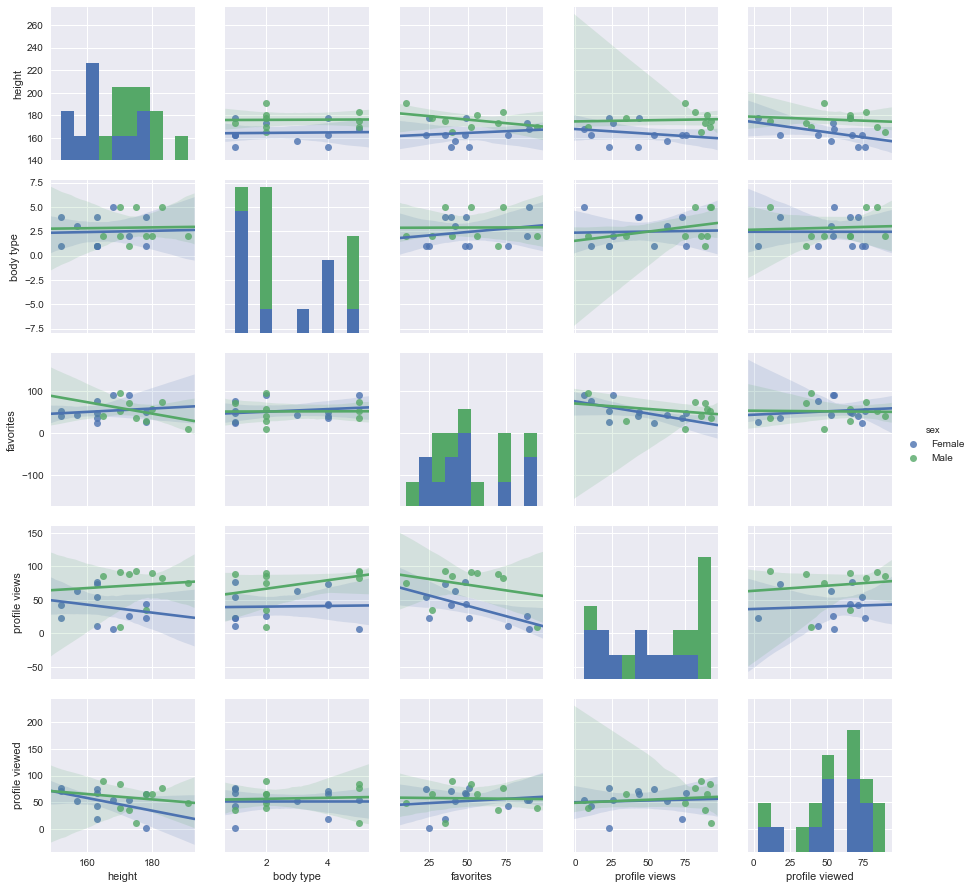

In [267]:
%matplotlib inline
import seaborn as sns
sns_plot = sns.pairplot(testdf, hue="sex", kind="reg")

sns_plot.savefig("results.png")

In [231]:
tempdf = testdf[['account type', 'sex', 'favorites', 'profile views', 'profile viewed']].groupby(['sex', 'account type']).mean()

In [232]:
tempdf

favorites  profile views  profile viewed
sex    account type                                          
Female attractive    51.545455      40.181818       52.818182
       generous            NaN            NaN             NaN
Male   attractive    60.000000      63.000000       58.200000
       generous      39.500000      84.000000       56.500000

In [269]:
ddf[['sex', 'height']].groupby('sex').mean()

height
sex               
Female  160.565217
Male    172.894737